# 1. Data Cleaning & Preprocessing
## I. Data Import & Validation

### Import libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

### Load dataset

In [31]:
df = pd.read_csv("Students Social Media Addiction.csv")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


### Verify structure

In [32]:
df.head(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [34]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## II. Handling Missing Values

In [35]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

No any missing values in the dataset

## III. Removing Duplicates

In [36]:
df.duplicated().sum()

np.int64(0)

No duplicates in the dataset

## IV. Removing Outliers

### Identify outliers

In [37]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

column_outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col] #[col] is used to print only column values. If we don't use that it will return entire row

    column_outliers[col] = {
        "Quartile 1": Q1,
        "Quartile 3": Q3,
        "Lower bound": lower_bound,
        "Upper bound": upper_bound,
        "Outlier count": len(outliers)
    }

for column, info in column_outliers.items():
    print(f"\nColumn: {column}")
    for key, value in info.items():
        print(f"{key}:{value}")


Column: Student_ID
Quartile 1:177.0
Quartile 3:529.0
Lower bound:-351.0
Upper bound:1057.0
Outlier count:0

Column: Age
Quartile 1:19.0
Quartile 3:22.0
Lower bound:14.5
Upper bound:26.5
Outlier count:0

Column: Avg_Daily_Usage_Hours
Quartile 1:4.1
Quartile 3:5.8
Lower bound:1.5499999999999994
Upper bound:8.35
Outlier count:3

Column: Sleep_Hours_Per_Night
Quartile 1:6.0
Quartile 3:7.7
Lower bound:3.4499999999999997
Upper bound:10.25
Outlier count:0

Column: Mental_Health_Score
Quartile 1:5.0
Quartile 3:7.0
Lower bound:2.0
Upper bound:10.0
Outlier count:0

Column: Conflicts_Over_Social_Media
Quartile 1:2.0
Quartile 3:4.0
Lower bound:-1.0
Upper bound:7.0
Outlier count:0

Column: Addicted_Score
Quartile 1:5.0
Quartile 3:8.0
Lower bound:0.5
Upper bound:12.5
Outlier count:0


### Identify outliers using box plot

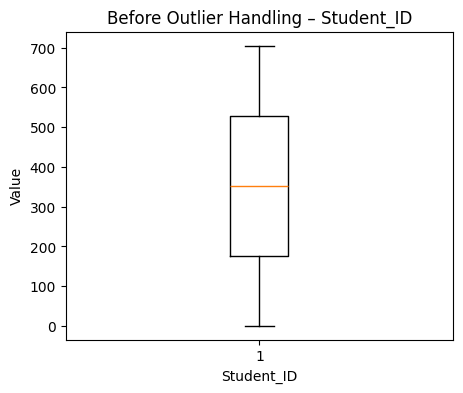

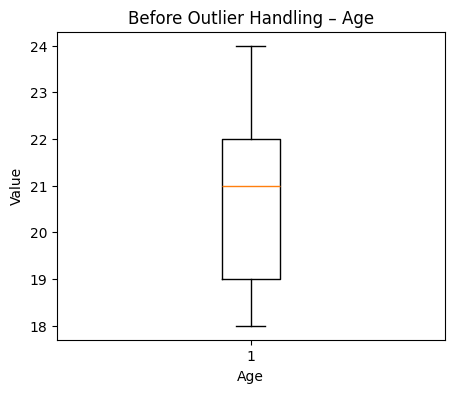

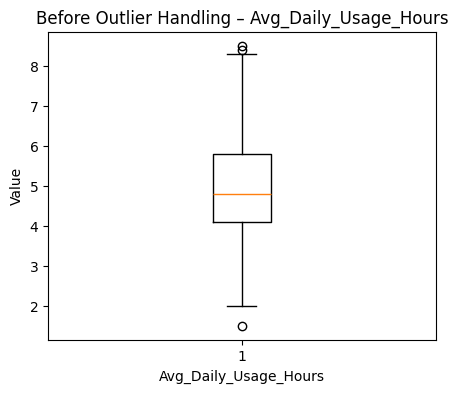

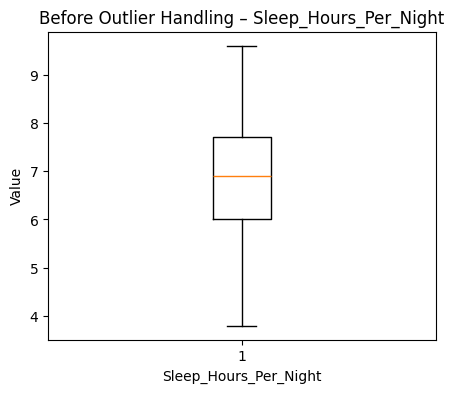

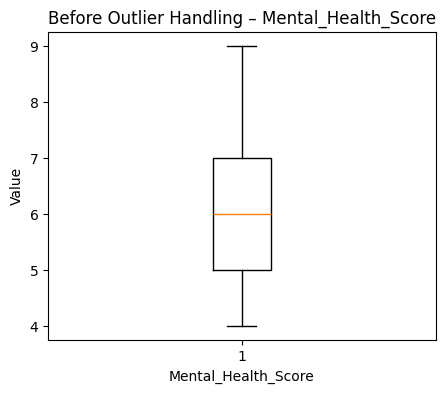

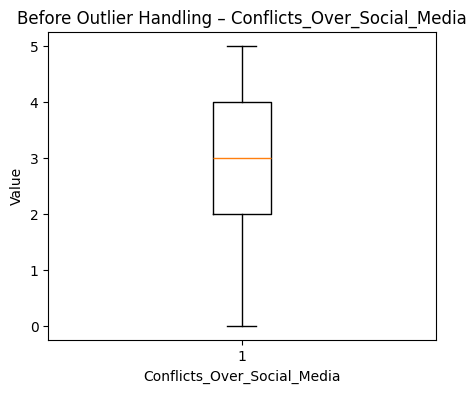

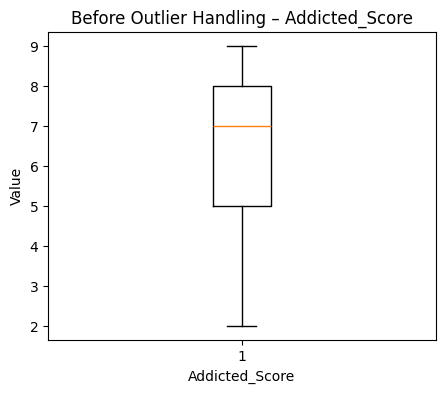

In [38]:
for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Before Outlier Handling – {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.show()

### Remove outliers

In [39]:
def handle_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for column in numeric_cols:
    df = handle_outliers_iqr(df, column)

### Check outliers after revome them using boxplots

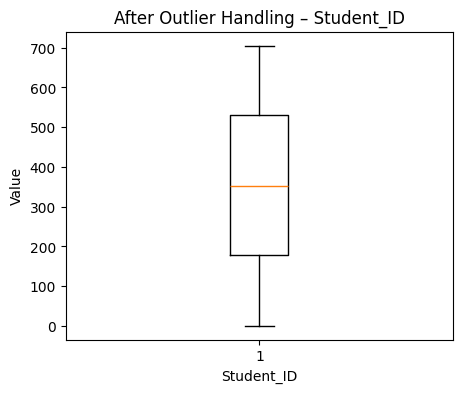

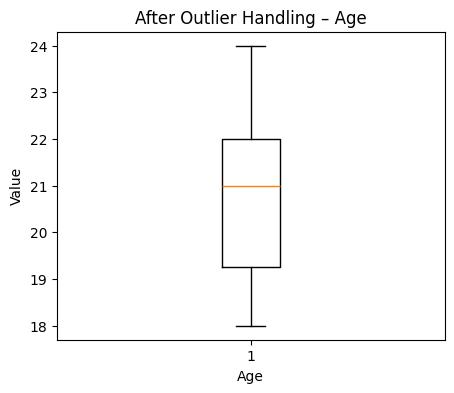

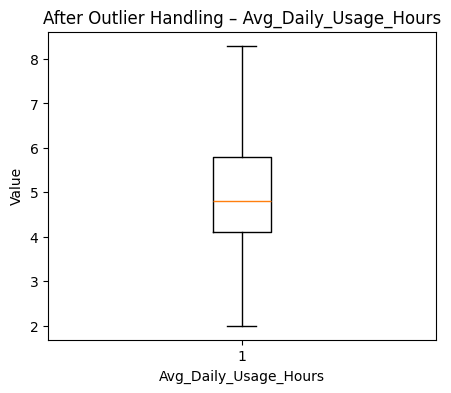

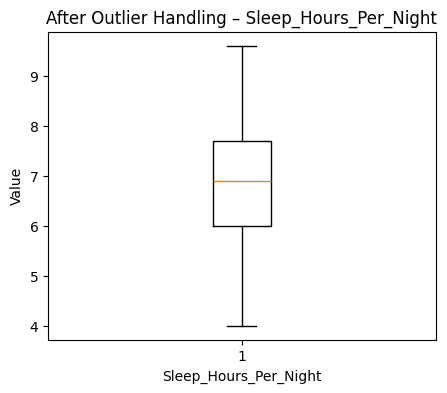

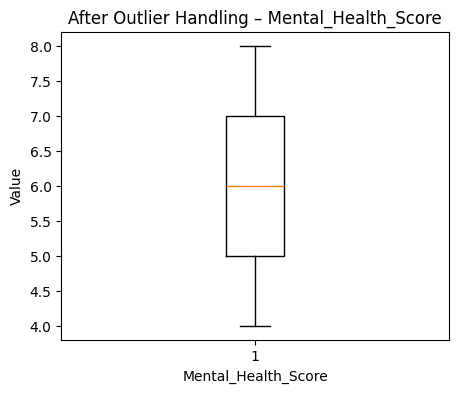

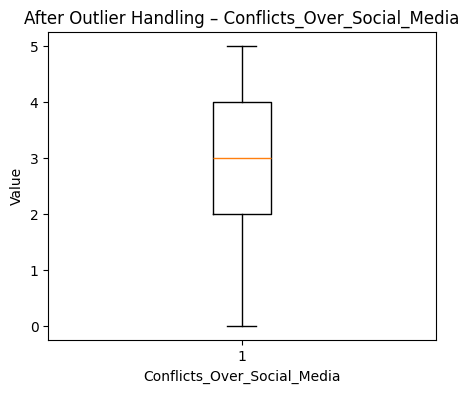

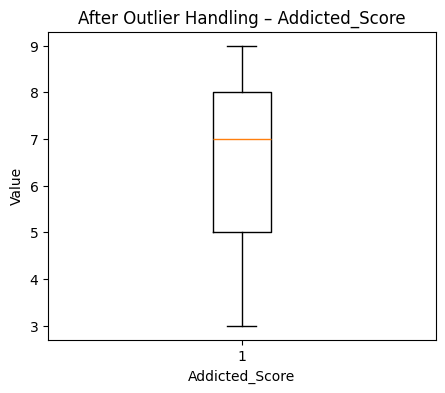

In [40]:
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"After Outlier Handling – {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.show()


## V. Encoding Categorical Variables

### Label Encoding for Gender

In [42]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [43]:
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,0,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,1,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,0,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,1,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,1,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,0,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,1,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,0,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,1,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
